In [1]:
import pandas as pd
import os
import glob 

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
complete_playlist_df = pd.read_pickle("files/complete_playlist_df.pkl")
complete_playlist_df.set_index("id", inplace=True)
transcripts_path = "files/transcripts/*.txt"

In [3]:
len(glob.glob(transcripts_path))

2705

In [4]:
transcripts_df = pd.DataFrame(columns=['stimulus_id', 'transcript'])
transcript_ids = []
transcripts = []
rows = []
# /import/c4dm-datasets-ext/toy_commercials/all_trimmed_commercials/ #old path
for transcript_fn in glob.glob(transcripts_path):
    transcript = None

    stimulus_id = os.path.basename(transcript_fn).split('.')[0]

    # load transcript_fn (txt file)
    with open(transcript_fn, 'r') as f:
        transcript = f.read().strip()

    if transcript is None or transcript == '':
        continue

    rows.append({
        'stimulus_id': stimulus_id,
        'transcript': transcript
    })

In [5]:
transcripts_df = pd.DataFrame(rows)
transcripts_df = transcripts_df.set_index('stimulus_id')

In [ ]:
transcripts_df

In [7]:
# merge with complete_playlist_df
transcripts_df = transcripts_df.merge(complete_playlist_df, left_index=True, right_index=True, how='inner')

In [ ]:
transcripts_df

In [9]:
# remove all rows with a transcript shorter than 40 characters
transcripts_df = transcripts_df[transcripts_df['transcript'].str.len() >= 40]
# remove all commercials shorter than 15 seconds
transcripts_df = transcripts_df[transcripts_df['duration'] >= 15]

In [10]:
transcripts_df

,transcript,title,description,upload_date,duration,view_count,categories,tags,like_count,download,error_logs
vSsTDtbsT8c,Get ready to prove it in battle with Beyblade ...,BeyBlade X - Smyths Toys,Get ready to prove in battel with Beyblade X w...,20250407,33,1921,[Entertainment],"[Smyths Toys, Toys (Industry), kids, smyths, t...",12,True,
DBwBFd-R55M,Kids love nothing more than to play! Each wood...,Squirrel Play Toys at Smyths Toys,Squirrel Play toys are designed with care and ...,20201014,21,2835577,[Entertainment],"[Smyths Toys, Toys (Industry), kids, smyths, t...",301,True,
nW6pzXuNCDs,Make a wish. It's the magical world of Sparkle...,Sparkle Girlz Dolls - Smyths Toys,ZURU Sparkle Girlz 45cm Princess Doll is perfe...,20220826,35,3423,[Entertainment],"[Smyths Toys, Toys (Industry), kids, smyths, t...",12,True,
f8QKUkc8jnU,Join Miles' galactic adventures. Train with Mi...,Smyths Toys - Disney Miles from Tomorrow Exo-suit,Protect Disney’s Miles from Tomorrow with his ...,20160308,20,3213,[Entertainment],"[Smyths Toys, Smiths Toys, Toys (Industry), Di...",6,True,
8kp_2Tu98Bc,They come out at night. They strike without mo...,Smyths Toys - Stretch Screamers,The only action figure that screams and squeal...,20131004,20,40482,[Entertainment],"[Smyths Toys, Smiths Toys, Toys (Industry)]",309,True,[0;31mERROR:[0m [youtube] 8kp_2Tu98Bc: Video...
...,...,...,...,...,...,...,...,...,...,...,...
MIe4tNjgEM0,"Talking rocks, golden locks, glitter trees, fa...",Smyths Toys - Barbie Dreamtopia Sweetville Pri...,This Barbie princess doll brings the magic of ...,20170713,34,7536,[Entertainment],"[Smyths Toys, Toys, (Industry)kids, Barbie Dre...",41,True,
kZLbrCPo_qI,"From Karma's World, it's Singing Karma! Hangin...",Karma's World - Smyths Toys,Karma is a star!\n\nLife’s a music video for a...,20220722,24,4258049,[Entertainment],"[Smyths Toys, Toys (Industry), kids, smyths, t...",100,True,
mmKOLGIO6A0,"From Disney Pixar, Finding Dory. It's my frien...",Smyths Toys - Disney Pixar Finding Dory My Fri...,Join in the wild and crazy adventures with eve...,20160819,34,46732,[Gaming],"[Smyths Toys, Smiths Toys, Toys (Industry), Di...",91,True,
_lZXpA6JiYo,This is the first time I've played this game. ...,LEGO 31096 Creator Twin-Rotor Helicopter - Smy...,Build and pilot awesome machines with this Twi...,20190604,39,10972,[Entertainment],"[Smyths Toys, Toys (Industry), kids, smyths, t...",72,True,


In [14]:
transcripts_df.to_csv("files/unseen_transcripts_final.csv")

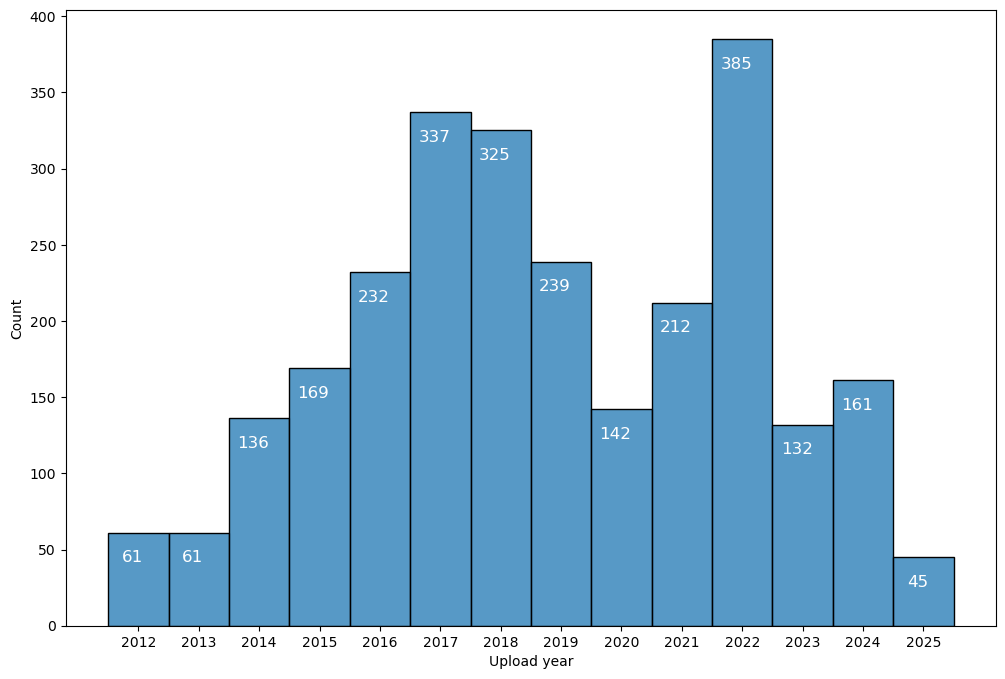

In [ ]:
upload_years = transcripts_df["upload_date"].rename("Upload year").sort_values().astype("str").str[:4]

plt.figure(figsize=(12,8))
ax = sns.histplot(x=upload_years, discrete=True)
for p in ax.patches:
    annotation = p.get_height() if p.get_height()>10 else ""
    ax.annotate(f'\n{annotation}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=12)
#plt.savefig("upload_years.pdf", bbox_inches="tight")
plt.show()

In [13]:
min(upload_dates), max(upload_dates)

(2012, 2025)